## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
data = pd.read_csv('clustering_data.csv', low_memory = False)

In [3]:
df = data[data['CircleName'] == "Madhya Pradesh Circle"]
df = df[['Longitude', 'Latitude']]

## Fixing data

In [4]:
def move_dash_to_front(lat):
    lat = str(lat)
    if lat.endswith('-'):
        return '-' + lat[:-1]
    return lat

In [5]:
df['Longitude'] = df['Longitude'].apply(move_dash_to_front)
df['Latitude'] = df['Latitude'].apply(move_dash_to_front)

In [6]:
count_nan = df['Latitude'].isna().sum().sum()
count_nan

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8284 entries, 554 to 157090
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Longitude  8284 non-null   object
 1   Latitude   8284 non-null   object
dtypes: object(2)
memory usage: 194.2+ KB


In [8]:
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

### Filtering out the sensible coordinates
Based on the range of actual coordinates

In [9]:
df = df[(df['Longitude'] > 74) & (df['Longitude'] < 83)]
df = df[(df['Latitude'] > 21) & (df['Latitude'] < 27)]

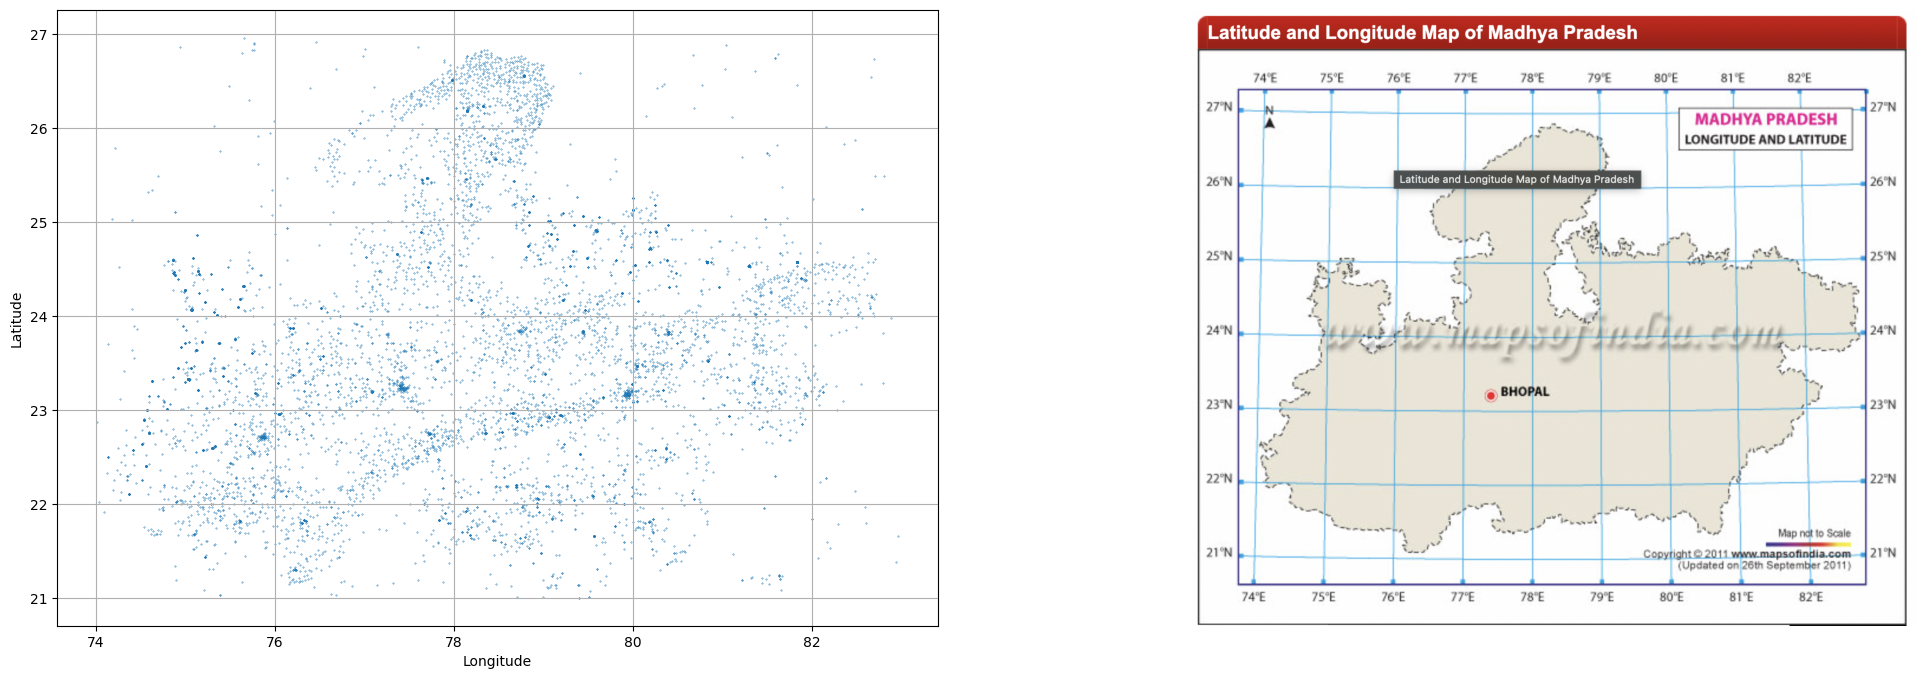

In [58]:
img = mpimg.imread('MP_coords.png')
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(25, 8))

# Plot the image on the first subplot
ax1.imshow(img)
ax1.axis('off')  # Turn off axis for the image

# Plot the scatter plot on the second subplot
ax2.scatter(df['Longitude'], df['Latitude'], s=0.1)
ax2.grid(True)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

#plt.tight_layout()  # Ensures plots are nicely spaced
plt.show()

 Reference: https://www.mapsofindia.com/lat_long/madhyapradesh/

# Building Model

In [70]:
data = df.to_numpy()
class KMeans:
    def __init__(self, data, k):
        self.k = k
        self.data = data
    
    def distance(self, p1, p2):
        return np.sqrt(np.sum((p1-p2)**2))
    
    def initialise_centroids(self):
        random_indices = np.random.choice(len(self.data), size = self.k, replace = False)
        centroids = self.data[random_indices]
        return centroids
    
    def fit(self, max_iterations = 100):
       
        centroids = self.initialise_centroids()
        
        for i in range(max_iterations):
            clusters = [[] for j in range(self.k)] #nested list of k clusters.
            
            for point in self.data:
                #Storing distances of all points from k centroids in a nested list.
                distances = [self.distance(point, centroid) for centroid in centroids]
                
                #Assigning points to clusters based on their distance from centroids.
                cluster = np.argmin(distances)
                clusters[cluster].append(point)
        
            new_centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])
                       
            # Checking for convergence before max_iterations is reached.
            if np.all(centroids == new_centroids):
                break
                
            centroids = new_centroids
            
        return clusters, centroids

In [71]:
kmeans = KMeans(data, 40)
clusters, centroids = kmeans.fit()

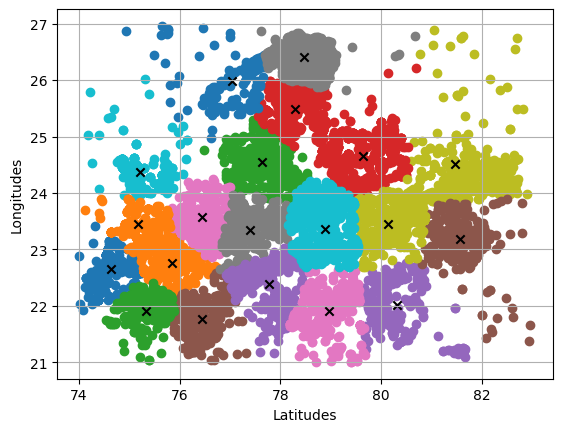

In [61]:
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1])

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', label='Centroids')
plt.xlabel('Latitudes')
plt.ylabel('Longitudes')
plt.grid(True)
plt.show()

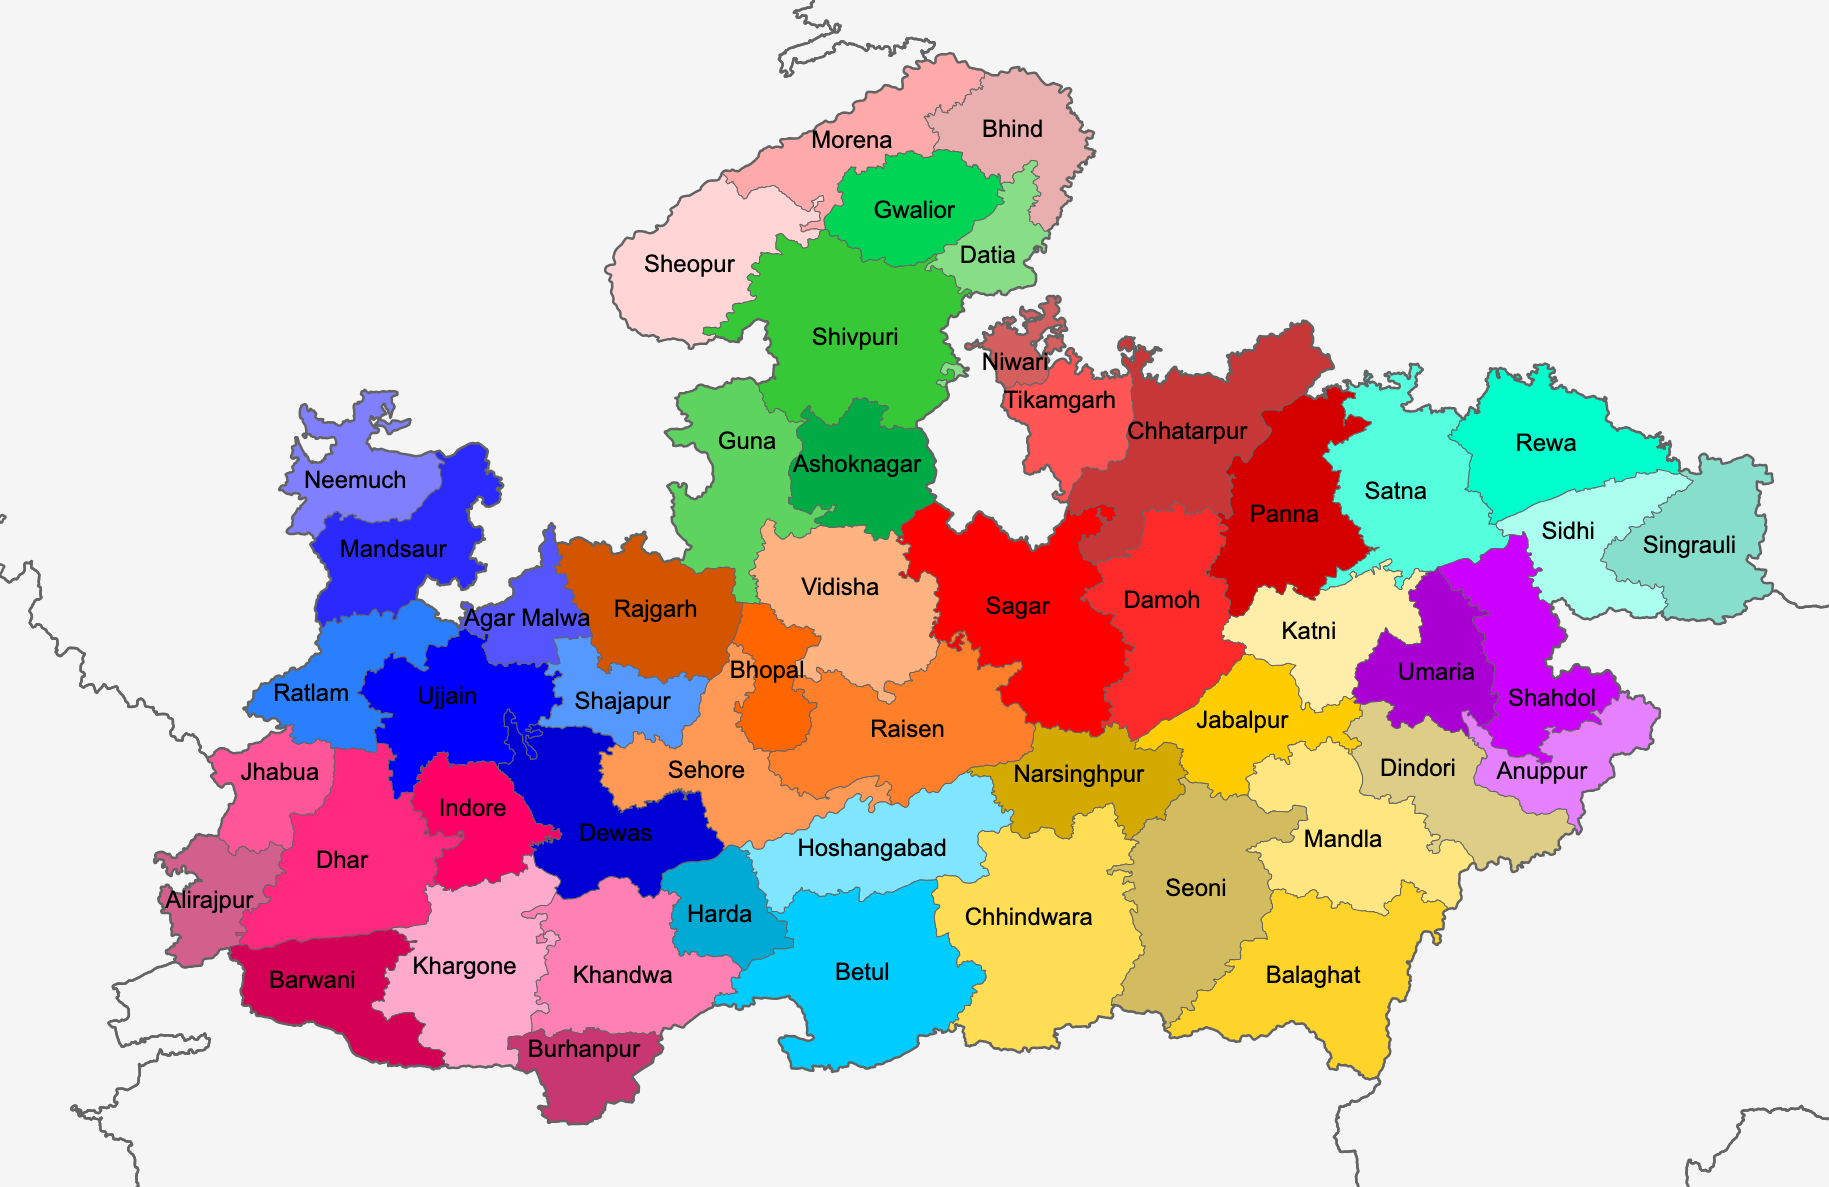

 Reference: https://en.wikipedia.org/wiki/List_of_districts_of_Madhya_Pradesh